In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix ,f1_score,accuracy_score

In [17]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.shape

(891, 12)

In [19]:
# df.columns returns an array of column names in the DataFrame
"""
map() is a built-in Python function
that applies a given function to each element of an iterable
(i.e., a sequence such as a list or an array) and returns an iterator of the results.
"""
df.columns = map(str.lower,df.columns)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.rename(columns={'sibsp':'num_siblings','passengerid':'passenger_id'},inplace=True)
df.head()

,passenger_id,survived,pclass,name,sex,age,num_siblings,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.drop(['name'],inplace=True,axis=1)
df.drop(['ticket'],inplace=True,axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   num_siblings  891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   cabin         204 non-null    object 
 9   embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [23]:
df.describe()

,passenger_id,survived,pclass,age,num_siblings,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
num_siblings      0
parch             0
fare              0
cabin           687
embarked          2
dtype: int64

In [25]:
df.corr()

/tmp/ipykernel_32/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,passenger_id,survived,pclass,age,num_siblings,parch,fare
passenger_id,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
num_siblings,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


/tmp/ipykernel_32/2416784505.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='BrBG')


<Axes: >

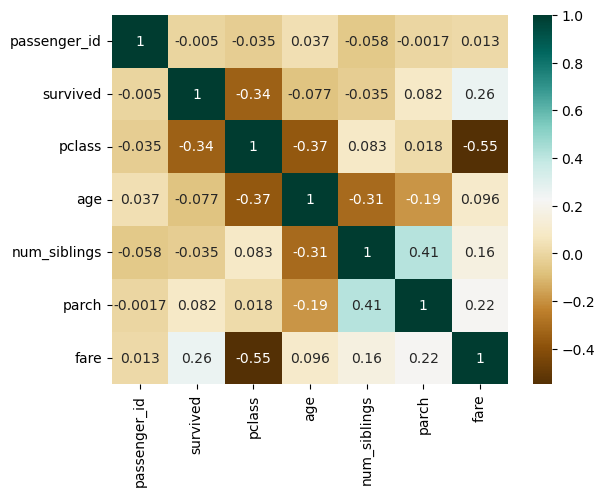

In [26]:
plt.figure()
sns.heatmap(df.corr(),annot=True,cmap='BrBG')

In [27]:
df.groupby('survived').count()['passenger_id']

survived
0    549
1    342
Name: passenger_id, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

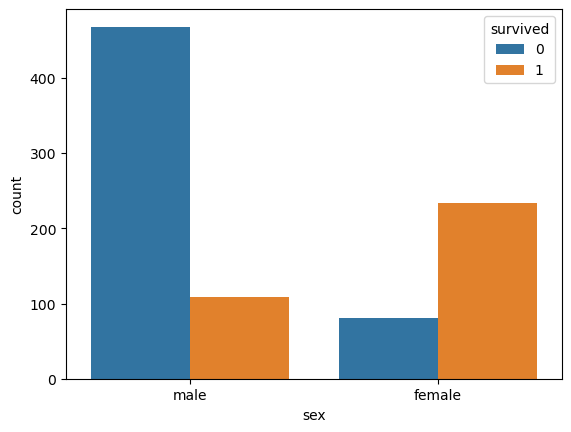

In [28]:
plt.figure()
sns.countplot(x='sex',hue='survived',data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

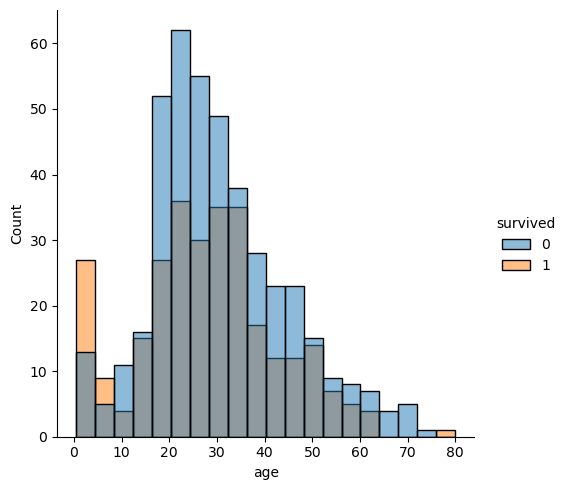

In [29]:
plt.figure()
sns.displot(x='age',hue='survived',data=df)

<Axes: xlabel='pclass', ylabel='count'>

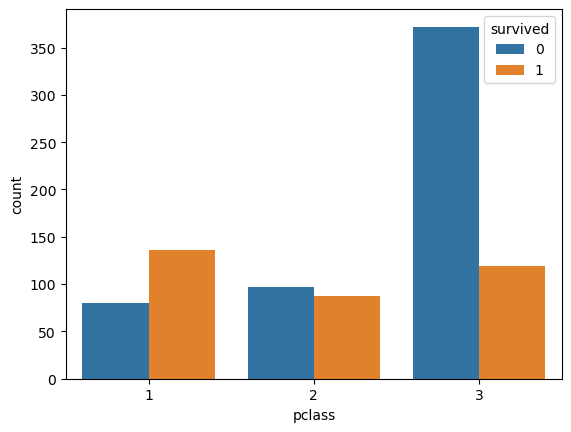

In [30]:
plt.figure()
sns.countplot(x='pclass',hue='survived',data=df)

**DATA CLEANING AND FEATURE SELECTION**

In [31]:
def CExist(df):
    df['cabin']=df['cabin'].fillna(0)
    df.cabin=df.cabin.apply(lambda x: 0 if x==0 else 1)
    return df

In [32]:
df=CExist(df)
df

,passenger_id,survived,pclass,sex,age,num_siblings,parch,fare,cabin,embarked
0,1,0,3,male,22.0,1,0,7.2500,0,S
1,2,1,1,female,38.0,1,0,71.2833,1,C
2,3,1,3,female,26.0,0,0,7.9250,0,S
3,4,1,1,female,35.0,1,0,53.1000,1,S
4,5,0,3,male,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,0,S
887,888,1,1,female,19.0,0,0,30.0000,1,S
888,889,0,3,female,NaN,1,2,23.4500,0,S
889,890,1,1,male,26.0,0,0,30.0000,1,C


In [33]:
def fill_age(trainset,testset=None):
    if testset is None:
        trainset=trainset.fillna(trainset.median())
        return trainset
    else:
        testset=testset.fillna(trainset.age.median())
        return testset

In [34]:
df = fill_age(df)

/tmp/ipykernel_32/973701624.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  trainset=trainset.fillna(trainset.median())


In [36]:
"""
pd.cut() is used to bin values into discrete intervals.
The pd.cut() function returns a new categorical object that contains the bin labels for each element in the input array. 
The output object is essentially a discretized version of the input array.
"""
def age_categorize(trainSet):
    interval = (0, 5, 12, 18, 25, 35, 60, 100)
    age_cat = ['babies', 'children', 'teenage', 'student', 'young', 'adult', 'senior']
    trainSet["age_cat"] = pd.cut(trainSet.age, interval, labels=age_cat)
    return trainSet

In [37]:
df = age_categorize(df)
df

,passenger_id,survived,pclass,sex,age,num_siblings,parch,fare,cabin,embarked,age_cat
0,1,0,3,male,22.0,1,0,7.2500,0,S,student
1,2,1,1,female,38.0,1,0,71.2833,1,C,adult
2,3,1,3,female,26.0,0,0,7.9250,0,S,young
3,4,1,1,female,35.0,1,0,53.1000,1,S,young
4,5,0,3,male,35.0,0,0,8.0500,0,S,young
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,0,S,young
887,888,1,1,female,19.0,0,0,30.0000,1,S,student
888,889,0,3,female,28.0,1,2,23.4500,0,S,young
889,890,1,1,male,26.0,0,0,30.0000,1,C,young


In [38]:
def family(df):
    df['family']=df['num_siblings']+df['parch']
    df['family']=df['family'].apply(lambda x:1 if x>0 else 0)
    return df

In [39]:
df=family(df)
df

,passenger_id,survived,pclass,sex,age,num_siblings,parch,fare,cabin,embarked,age_cat,family
0,1,0,3,male,22.0,1,0,7.2500,0,S,student,1
1,2,1,1,female,38.0,1,0,71.2833,1,C,adult,1
2,3,1,3,female,26.0,0,0,7.9250,0,S,young,0
3,4,1,1,female,35.0,1,0,53.1000,1,S,young,1
4,5,0,3,male,35.0,0,0,8.0500,0,S,young,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,0,S,young,0
887,888,1,1,female,19.0,0,0,30.0000,1,S,student,0
888,889,0,3,female,28.0,1,2,23.4500,0,S,young,1
889,890,1,1,male,26.0,0,0,30.0000,1,C,young,0


In [41]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category' :
        df[i]=le.fit_transform(df[i])
        df = pd.get_dummies(df, columns=[i])
df.head()

,passenger_id,survived,pclass,age,num_siblings,parch,fare,cabin,family,sex_0,...,embarked_1,embarked_2,embarked_3,age_cat_0,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6
0,1,0,3,22.0,1,0,7.2500,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,2,1,1,38.0,1,0,71.2833,1,1,1,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,1,1,...,0,1,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,1,0,0,0,0,0,0,0,1


**MODEL TRAINING**

<Axes: xlabel='age', ylabel='pclass'>

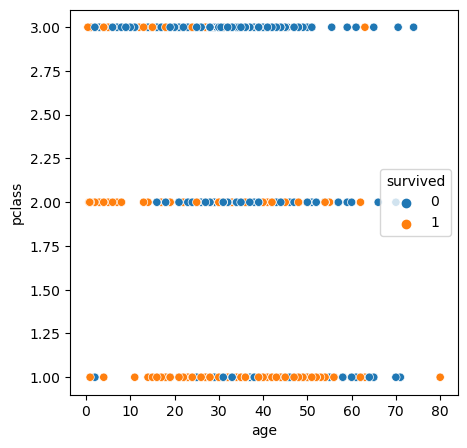

In [66]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = 'age', y = 'pclass', data = df, hue = 'survived')

<Axes: xlabel='age', ylabel='sex_0'>

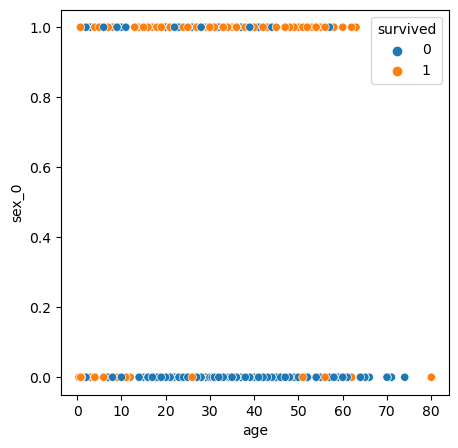

In [64]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = 'age', y = 'sex_0', data = df, hue = 'survived')

In [42]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['survived']),df.survived,test_size=0.3)
print(f"Train size {x_train.shape[0]} rows\nTest size {x_test.shape[0]} rows")

Train size 623 rows
Test size 268 rows


In [43]:
X_train = np.array(x_train.iloc[:,0:21])
X_test = np.array(x_test.iloc[:,0:21])
Y_train = np.array(y_train)
Y_test = np.array(y_test)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(623, 21)
(268, 21)
(623,)
(268,)


In [45]:
Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)
print(Y_train.shape)
print(Y_test.shape)

(623, 1)
(268, 1)


In [46]:
W = np.random.rand(21,1)
b = 0
assert(W.shape == ( x_train.shape[1],1))
assert(isinstance(b, float) or isinstance(b, int))

In [47]:
iterations = 1000000
Alpha = .0000001
m = int(X_train.shape[0])

In [48]:
def Hypothesis(X,W,b):
    Z = np.dot(X,W) + b 
    return Z

In [49]:
import math
def sigmoid(Z):
    A = 1/ (1 + np.exp(-Z))  
    return A

In [50]:
def J(X,W,b,Y):
    cost = 0
    m = X.shape
    z_i = Hypothesis(X,W,b)
    f_wb_i = sigmoid(z_i)
    cost += np.sum(-Y*np.log(f_wb_i) + (1-Y)*np.log(1-f_wb_i))
    total_cost = cost/m
    return total_cost

In [51]:
def GradientDescent(X,W,b,Y,iterations,Alpha,m):
    for i in range(iterations):
        z_i = Hypothesis(X,W,b)
        f_wb_i = sigmoid(z_i)
        err = f_wb_i - Y
        dw = (1/m)*(np.sum(err*X,axis=0).reshape(21,1))
        db = np.sum(err)/m
        W = W - Alpha*dw
        b = b - Alpha*db
    return W ,b 

In [52]:
def predict(W,b,X):
    m = X.shape[0]
    Y_predicted = np.zeros((m,1))
    W = W.reshape(X.shape[1],1)
    Z = Hypothesis(X,W,b)
    H = sigmoid(Z)
    for i in range(H.shape[0]):
        Y_predicted[i,0] = 1 if H[i,0]>0.5 else 0
    assert(Y_predicted.shape == (m,1) ) 
    return Y_predicted 

In [53]:
def predict(W,b,X):
    m = X.shape[0]
    Y_predicted = np.zeros((m,1))
    W = W.reshape(X.shape[1],1)
    Z = Hypothesis(X,W,b)
    H = sigmoid(Z)
    for i in range(H.shape[0]):
        Y_predicted[i,0] = 1 if H[i,0]>0.5 else 0
    assert(Y_predicted.shape == (m,1) ) 
    return Y_predicted 

In [56]:
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

In [57]:
W,b= GradientDescent(X_train,W,b,Y_train,iterations,Alpha,m)
Y_prediction_train = predict(W,b,X_train)
Y_prediction_test = predict(W,b,X_test)

print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train-Y_train))*100))
print("train F1: {} %".format(F1_score(Y_prediction_train,Y_train)))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test-Y_test))*100))
print("train F1: {} %".format(F1_score(Y_prediction_test,Y_test)))

train accuracy: 70.30497592295345 %
train F1: 0.5916114790286976 %
test accuracy: 70.52238805970148 %
train F1: 0.5948717948717949 %


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix ,f1_score,accuracy_score

lr=LogisticRegression(max_iter=1000,random_state=0)
lr.fit(X_train,Y_train)
pred = lr.predict(X_test) 
pred_train = lr.predict(X_train) 

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
print("Train Confusion Matrix",confusion_matrix(pred_train,Y_train))
print("Train F1_Score",f1_score(pred_train,Y_train))
from sklearn.metrics import confusion_matrix ,f1_score
print(confusion_matrix(pred,Y_test))
print("Test F1_Score",f1_score(pred,Y_test))
print("\nAccuracy: ",accuracy_score(Y_test,pred))

Train Confusion Matrix [[333  65]
 [ 51 174]]
Train F1_Score 0.7500000000000001
[[137  28]
 [ 28  75]]
Test F1_Score 0.7281553398058251

Accuracy:  0.7910447761194029


**DECISION TREE CALSSIFIER**

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train,Y_train)
pred_dt = dt.predict(X_test) 
pred_train_dt = dt.predict(X_train) 

In [61]:
print("Train Confusion Matrix",confusion_matrix(pred_train_dt,Y_train))
print("Train F1_Score",f1_score(pred_train_dt,Y_train))
print(confusion_matrix(pred_dt,Y_test))
print("Test F1_Score",f1_score(pred_dt,Y_test))
print("\nAccuracy: ",accuracy_score(Y_test,pred_dt))

Train Confusion Matrix [[384   0]
 [  0 239]]
Train F1_Score 1.0
[[134  31]
 [ 31  72]]
Test F1_Score 0.6990291262135923

Accuracy:  0.7686567164179104
